In [1]:
import pandas as pd

In [22]:
code =  pd.read_csv('../dataset/icd_list_dataset_v9.csv', index_col=False)
df = pd.read_csv('../dataset/master_dataset.csv', index_col=False)

In [24]:
print(len(df), len(df.columns))

448972 119


In [14]:
code[code['icd_list'].str.contains('4019')]['stay_id']

9         32908139
10        31931401
11        33821726
12        33704632
13        32967983
            ...   
56650     34814488
56651     33300224
56652     36478825
56655     31540374
167408    32917002
Name: stay_id, Length: 13433, dtype: int64

In [26]:
df_cut = df[df['stay_id'].isin(code[code['icd_list'].str.contains('4019')]['stay_id'])]

In [ ]:
df_cut.to_csv('../dataset/df_patient.csv', index=False)

In [19]:
train =  pd.read_csv('../dataset/train.csv', index_col=False)
test = pd.read_csv('../dataset/test.csv', index_col=False)

In [5]:
t = train[train['stay_id'].isin(code[code['icd_list'].str.contains('4019')]['stay_id'])]

In [20]:
print(len(train), len(test))

359043 89761


In [35]:
d = pd.DataFrame(df.isnull().sum())
d

,0
index,0
subject_id,0
hadm_id,234535
stay_id,0
intime,0
...,...
ed_sbp_last,19917
ed_dbp_last,19917
ed_pain_last,52630
n_med,0


In [134]:
pd.options.display.max_rows = 200
d = pd.DataFrame((df.isnull().sum() /len(df))*100, columns=['결측비율 (%)']).sort_values(by='결측비율 (%)', ascending=False)
d['col'] = d.index
d.index = range(0, len(d))
d = d[['col', '결측비율 (%)']]
d

,col,결측비율 (%)
0,deathtime,98.915300
1,dod,95.963445
2,time_to_icu_transfer,92.514901
3,intime_icu,92.514901
4,time_to_icu_transfer_hours,92.514901
5,edregtime,52.874567
6,edouttime,52.874567
7,insurance,52.244238
8,admittime,52.244238
9,dischtime,52.244238


In [102]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns

In [141]:
data = d[d['결측비율 (%)'] != 0].sort_values(by="결측비율 (%)", ascending=False).reset_index(drop=True)

In [142]:
data

,col,결측비율 (%)
0,deathtime,98.915300
1,dod,95.963445
2,time_to_icu_transfer,92.514901
3,intime_icu,92.514901
4,time_to_icu_transfer_hours,92.514901
5,edregtime,52.874567
6,edouttime,52.874567
7,insurance,52.244238
8,admittime,52.244238
9,dischtime,52.244238


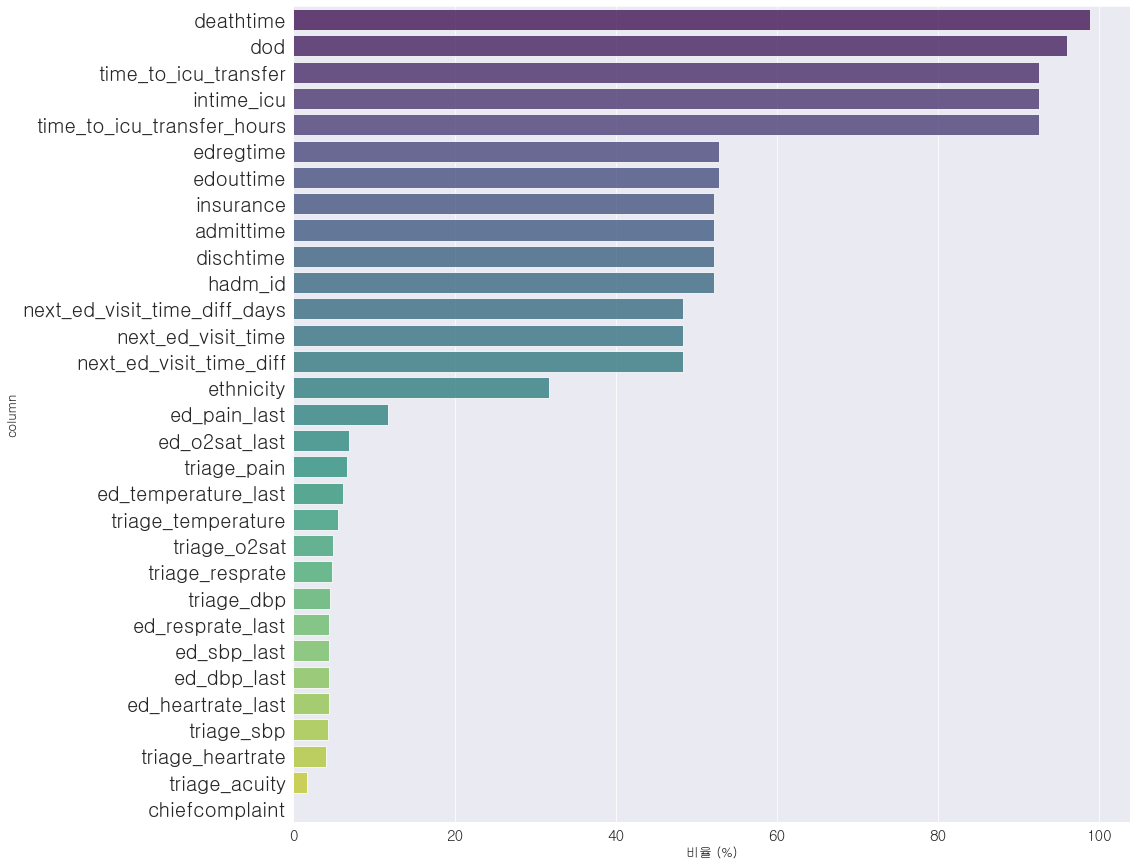

In [215]:

plt.rcParams["figure.figsize"] = (15,15)
sns.set_style('darkgrid')
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
sns.barplot(data=data, x='결측비율 (%)', y='col', alpha=0.8, palette='viridis')
# sns.barplot(data=data, x=data.iloc[0], y=data.iloc[1])
# for p in ax.patches:
#     left, bottom, width, height = p.get_bbox().bounds
#     ax.annotate("%.1f m"%(height/1e6), (left+width/2, height*1.01), ha='center')
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=20)
plt.xlabel('비율 (%)', fontsize=13)
plt.ylabel('column', fontsize=13)
# plt.legend(loc='lower right')
plt.show()

In [190]:
df = df.drop(data[data['결측비율 (%)'] > 20]['col'], axis=1)

In [191]:
df[data[data['결측비율 (%)'] <= 12]['col']].describe()

,ed_pain_last,ed_o2sat_last,triage_pain,ed_temperature_last,triage_temperature,triage_o2sat,triage_resprate,triage_dbp,ed_resprate_last,ed_sbp_last,ed_dbp_last,ed_heartrate_last,triage_sbp,triage_heartrate,triage_acuity
count,396342.000000,418076.000000,418906.000000,421297.000000,424151.000000,427090.000000,427378.000000,428626.000000,428841.000000,429055.000000,429055.000000,429352.000000,429472.000000,430806.000000,441589.000000
mean,2.130121,98.179373,4.425426,98.130147,98.013587,98.471571,17.600109,81.174236,17.263213,127.421333,74.931594,78.225452,135.393569,85.099860,2.625389
std,2.987660,15.659262,4.088461,9.089977,3.947567,16.703646,22.303354,1029.187347,2.533422,19.904714,192.642811,14.687778,236.173643,18.040983,0.708400
min,0.000000,0.000000,-1.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,97.000000,0.000000,97.800000,97.500000,97.000000,16.000000,68.000000,16.000000,114.000000,64.000000,68.000000,120.000000,72.000000,2.000000
50%,0.000000,99.000000,5.000000,98.100000,98.000000,99.000000,18.000000,77.000000,17.000000,126.000000,73.000000,77.000000,133.000000,84.000000,3.000000
75%,4.000000,100.000000,8.000000,98.400000,98.600000,100.000000,18.000000,87.000000,18.000000,139.000000,82.000000,88.000000,148.000000,96.000000,3.000000
max,150.000000,9712.000000,180.000000,989.000000,986.000000,9322.000000,14169.000000,661672.000000,181.000000,854.000000,97100.000000,229.000000,151103.000000,1228.000000,5.000000


In [192]:
df[data[data['결측비율 (%)'] <= 12]['col']].dtypes

ed_pain_last           float64
ed_o2sat_last          float64
triage_pain            float64
ed_temperature_last    float64
triage_temperature     float64
triage_o2sat           float64
triage_resprate        float64
triage_dbp             float64
ed_resprate_last       float64
ed_sbp_last            float64
ed_dbp_last            float64
ed_heartrate_last      float64
triage_sbp             float64
triage_heartrate       float64
triage_acuity          float64
chiefcomplaint          object
dtype: object

In [193]:
len(data[data['결측비율 (%)'] <= 12]['col'])-1

15

In [194]:
df['chiefcomplaint']

0                   Abd pain, Abdominal distention
1                             Abdominal distention
2                                      Hypotension
3         Abdominal distention, Abd pain, LETHAGIC
4                                  n/v/d, Abd pain
                            ...                   
448967                                  Wound eval
448968                        Abd pain, Wound eval
448969                        Abd pain, Wound eval
448970        Altered mental status, Substance use
448971                                  HEAD BLEED
Name: chiefcomplaint, Length: 448972, dtype: object

In [195]:
obj = pd.DataFrame(df.dtypes == 'object')
df[obj[obj[0] == True].index]

,intime,outtime,gender,ed_los,chiefcomplaint
0,2180-05-06 19:17:00,2180-05-06 23:30:00,F,0 days 04:13:00,"Abd pain, Abdominal distention"
1,2180-06-26 15:54:00,2180-06-26 21:31:00,F,0 days 05:37:00,Abdominal distention
2,2180-07-22 16:24:00,2180-07-23 05:54:00,F,0 days 13:30:00,Hypotension
3,2180-07-23 05:54:00,2180-07-23 14:00:00,F,0 days 08:06:00,"Abdominal distention, Abd pain, LETHAGIC"
4,2180-08-05 20:58:00,2180-08-06 01:44:00,F,0 days 04:46:00,"n/v/d, Abd pain"
...,...,...,...,...,...
448967,2119-08-11 09:15:00,2119-08-11 13:40:00,M,0 days 04:25:00,Wound eval
448968,2147-07-17 17:18:00,2147-07-18 17:34:00,F,1 days 00:16:00,"Abd pain, Wound eval"
448969,2149-01-08 09:11:00,2149-01-08 18:12:00,F,0 days 09:01:00,"Abd pain, Wound eval"
448970,2158-12-24 11:41:00,2158-12-24 11:41:00,F,0 days 00:00:00,"Altered mental status, Substance use"


In [198]:
len(df['chiefcomplaint'].unique())

62892

In [203]:
df.filter(regex='chiefcom_')

,chiefcom_chest_pain,chiefcom_abdominal_pain,chiefcom_headache,chiefcom_shortness_of_breath,chiefcom_back_pain,chiefcom_cough,chiefcom_nausea_vomiting,chiefcom_fever_chills,chiefcom_syncope,chiefcom_dizziness
0,False,True,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
448967,False,False,False,False,False,False,False,False,False,False
448968,False,True,False,False,False,False,False,False,False,False
448969,False,True,False,False,False,False,False,False,False,False
448970,False,False,False,False,False,False,False,False,False,False


In [200]:
df['chiefcomplaint']

0                   Abd pain, Abdominal distention
1                             Abdominal distention
2                                      Hypotension
3         Abdominal distention, Abd pain, LETHAGIC
4                                  n/v/d, Abd pain
                            ...                   
448967                                  Wound eval
448968                        Abd pain, Wound eval
448969                        Abd pain, Wound eval
448970        Altered mental status, Substance use
448971                                  HEAD BLEED
Name: chiefcomplaint, Length: 448972, dtype: object

In [204]:
df['age']

0         52
1         52
2         52
3         52
4         52
          ..
448967    57
448968    46
448969    48
448970    49
448971    57
Name: age, Length: 448972, dtype: int64

c:\Users\jongm\anaconda3\envs\testdog\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


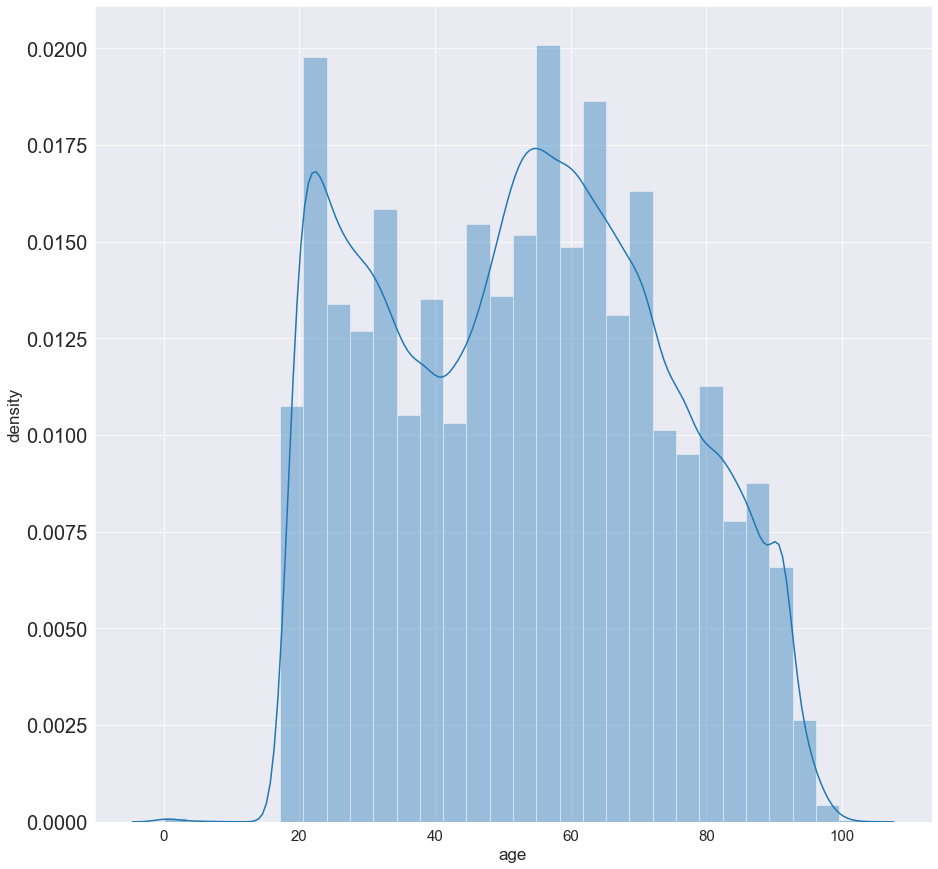

In [214]:
# plt.rcParams["figure.figsize"] = (15,15)
sns.set_style('darkgrid')
sns.distplot(df['age'], bins=30)
# sns.barplot(data=data, x=data.iloc[0], y=data.iloc[1])
# for p in ax.patches:
#     left, bottom, width, height = p.get_bbox().bounds
#     ax.annotate("%.1f m"%(height/1e6), (left+width/2, height*1.01), ha='center')
# plt.rc('xtick', labelsize=15)
# plt.rc('ytick', labelsize=20)
plt.xlabel('age', fontsize=17)
plt.ylabel('density', fontsize=17)
# plt.legend(loc='lower right')
plt.show()